# Morphological Operators
* Morphological operators are sets of kernels that can achieve a variety of effects such as reducing noise.
* Certain operators are very good at reducing blackpoint on a white background and vice versa. Other types of operators can also achieve an erosion(geological process in which earthen materials are worn away and transported by natural forces such as wind or water) and the dilation effect that can add or erode(slow destruction of substance) from.
* Other types of operators can also achieve an erosion and the dilation effect that can add or erode(slow destruction of substance) from an existing image. 
* This effect is actually most easily seen on text data.
* So what we will be doing is we're going to practice various morphological operators on some simple white text on a black background.

* Really great link on Morphological Operations [ https://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm ]
* More to read here [ https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html ]

In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [79]:
def display_img(img):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

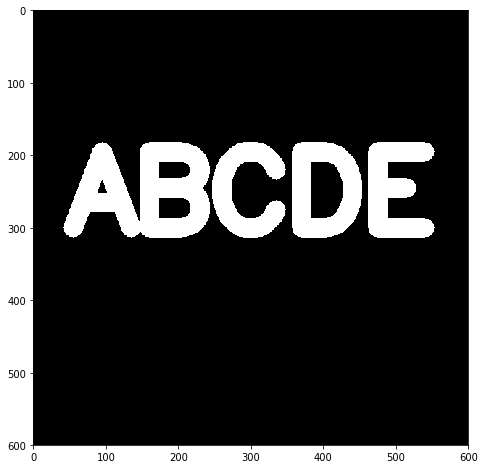

In [80]:
img = load_img()
display_img(img)

## Erosion
* The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what does it do? The kernel slides through the image (as in 2D convolution). A pixel in the  original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

* So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small  white noises, detach two connected objects etc.

## CV2 :: Erode
$$erode(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst$$
* We will going to use three parameters src, kernel and iterations.
* src - The source image
* kernel - The kernel you would create
* iterations: It is number of times erosion is applied.

In [81]:
kernel = np.ones((5,5),dtype=np.int8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=int8)

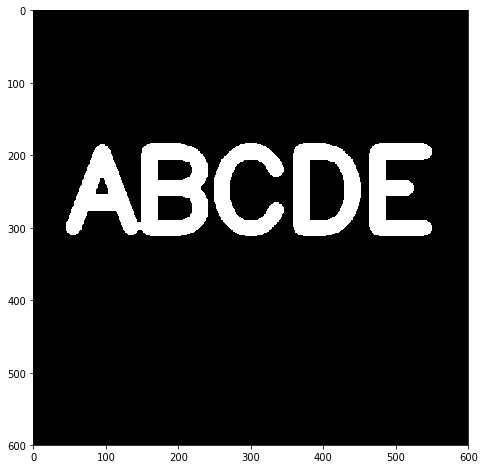

In [82]:
result = cv2.erode(img,kernel,iterations = 1)     
display_img(result) # we can see the difference that connection is getting weaker between A & B

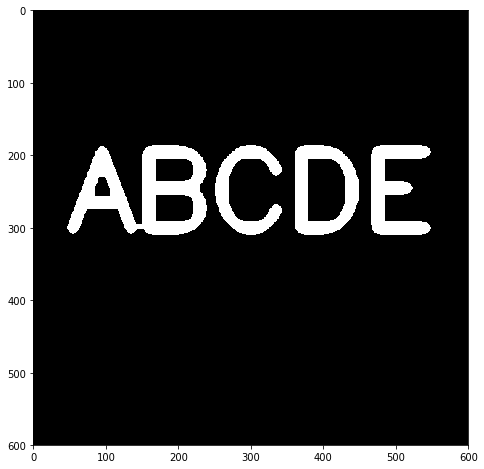

In [83]:
img = load_img()
result = cv2.erode(img,kernel,iterations = 2)
display_img(result) 

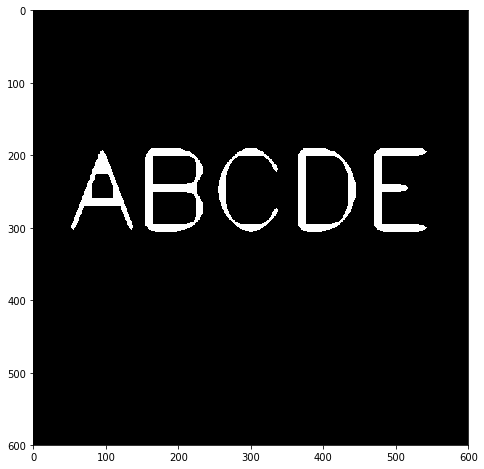

In [84]:
img = load_img()
result = cv2.erode(img,kernel,iterations = 4)
display_img(result)
# we can easily see the difference that the more the iterations will be the greater the erosion we would see.

## Dilation
* It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won’t come back, but our object area increases. It is also useful in joining broken parts of an object.

## CV2 :: Dilate
$$dilate(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst$$
* We will going to use three parameters src, kernel and iterations.
* src - The source image
* kernel - The kernel you would create
* iterations: It is number of times erosion is applied.

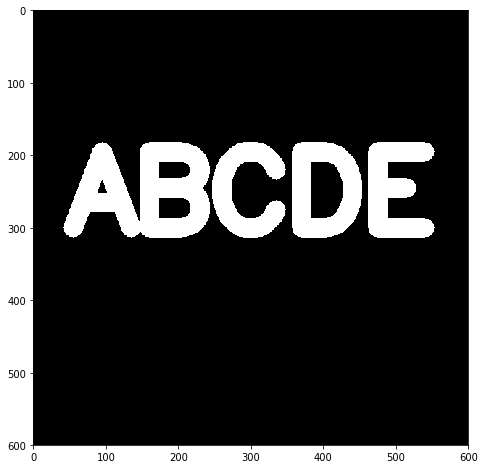

In [85]:
img = load_img()
display_img(img)

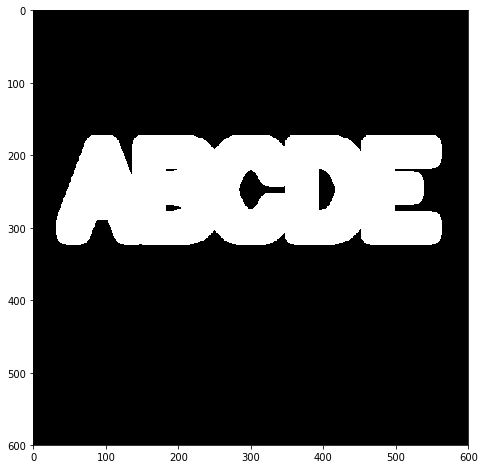

In [86]:
img = load_img()
dilation = cv2.dilate(img,kernel,iterations = 5)
display_img(dilation)

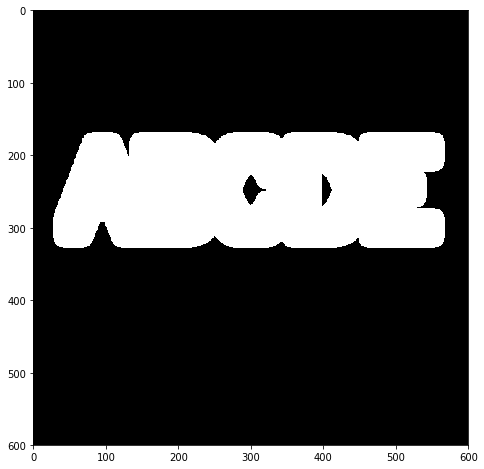

In [87]:
img = load_img()
dilation = cv2.dilate(img,kernel,iterations = 7)
display_img(dilation)

## Opening
* Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above.Here we use the function, cv2.morphologyEx()
* MORPH_OPEN is usefull for removing background noise.

## CV2 :: MorphologyEx
$$morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst$$
* We will going to use three parameters src, kernel and iterations.
* src - The source image
* op - Type of a morphological operation(you can check using cv2.MORPH_tab)
* kernel - The kernel you would create
* iterations: It is number of times erosion is applied.

### Opening
* We will use cv2.MORPH_OPEN as op parameter.

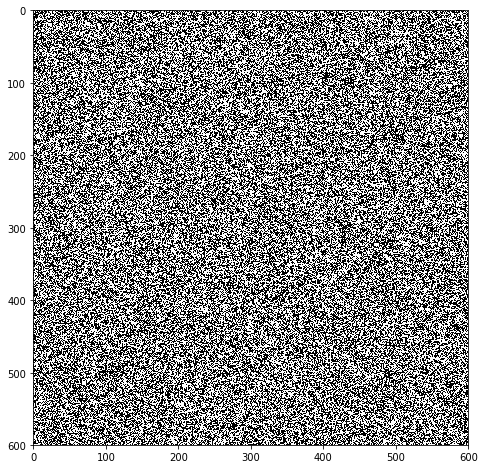

In [97]:
img = load_img()
white_noise = np.random.randint(0,2,(600,600))
display_img(white_noise)

In [98]:
white_noise

array([[1, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 1, 0, 1],
       [1, 0, 1, ..., 0, 1, 1]])

In [99]:
white_noise.max()

1

In [100]:
white_noise = white_noise*255 # making all the values between 0 to 255 as other img.

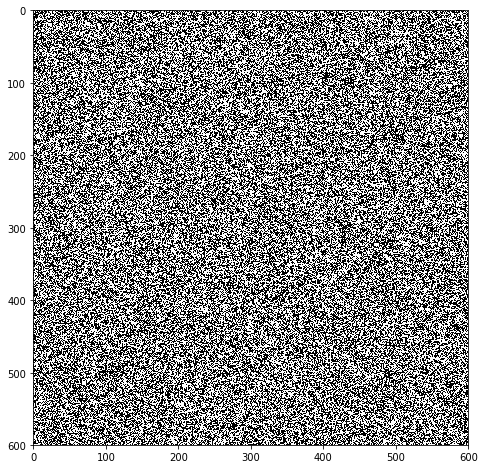

In [101]:
display_img(white_noise)

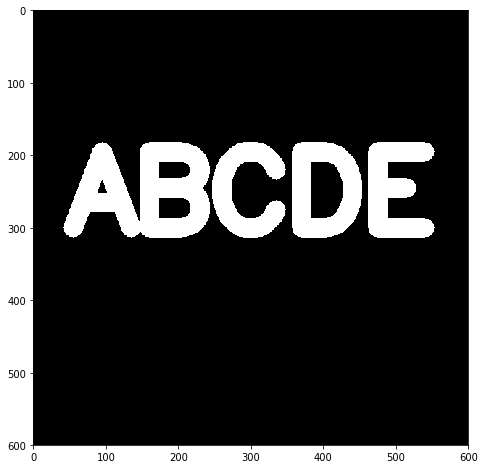

In [102]:
display_img(img)

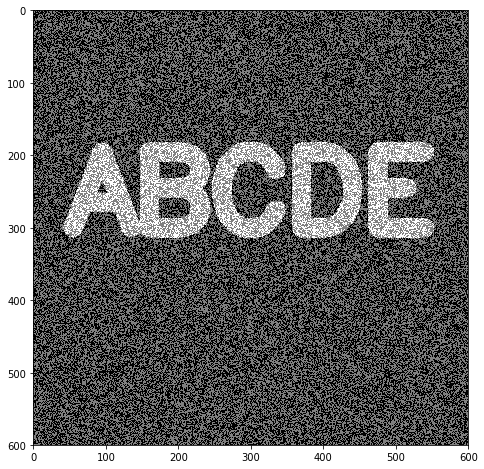

In [103]:
noisey_img = white_noise + img
display_img(noisey_img)

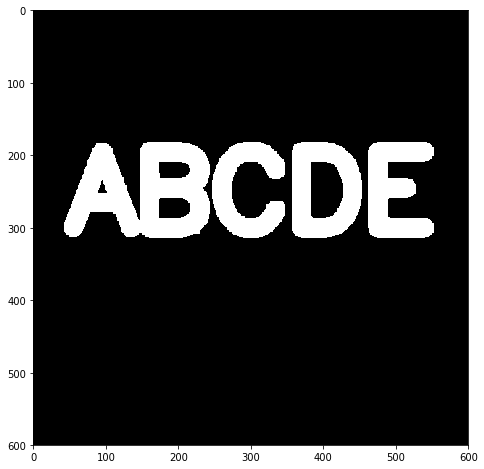

In [104]:
result = cv2.morphologyEx(noisey_img,cv2.MORPH_OPEN,kernel,iterations = 2)
display_img(result)

## Closing
* Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.
* Here we use the function, cv2.morphologyEx()
* MORPH_CLOSE is usefull for removing foreground noise.

In [200]:
# Let's create image with foregroung noise
img = load_img()
black_noise = np.random.randint(low=0,high=2,size=(600,600))
black_noise # its just same as white_noise right now

array([[1, 1, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 1, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 1, 0]])

In [201]:
black_noise = black_noise * -255 # multiplying by -255 wont affect the black background but it will affect foreground in white  
black_noise # since 0 is bigger value and -255 is lesser value so 0 is considered as white and -255 is considered as black

array([[-255, -255, -255, ...,    0, -255,    0],
       [   0, -255,    0, ..., -255,    0, -255],
       [   0, -255, -255, ..., -255, -255, -255],
       ...,
       [   0, -255, -255, ..., -255,    0, -255],
       [   0,    0,    0, ..., -255,    0, -255],
       [   0,    0, -255, ...,    0, -255,    0]])

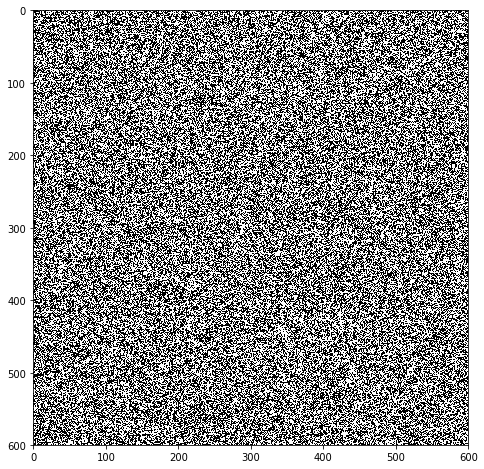

In [202]:
display_img(black_noise)

In [204]:
black_noise_img = black_noise + img
black_noise_img,black_noise_img.min()

(array([[-255., -255., -255., ...,    0., -255.,    0.],
        [   0., -255.,    0., ..., -255.,    0., -255.],
        [   0., -255., -255., ..., -255., -255., -255.],
        ...,
        [   0., -255., -255., ..., -255.,    0., -255.],
        [   0.,    0.,    0., ..., -255.,    0., -255.],
        [   0.,    0., -255., ...,    0., -255.,    0.]]), -255.0)

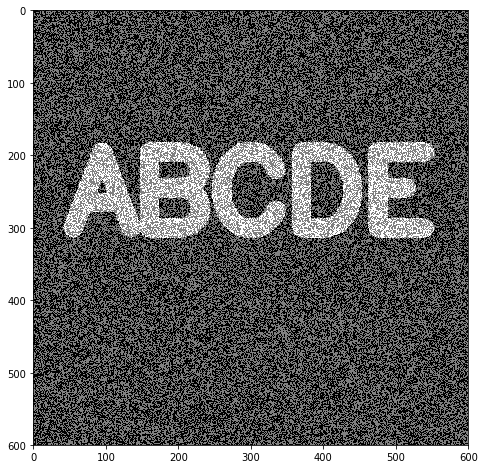

In [205]:
display_img(black_noise_img)

In [207]:
black_noise_img[black_noise_img == -255] = 0
black_noise_img.min(),black_noise_img.max()
# the black_noise is going to randomly subtract 255 from random pixel 

(0.0, 255.0)

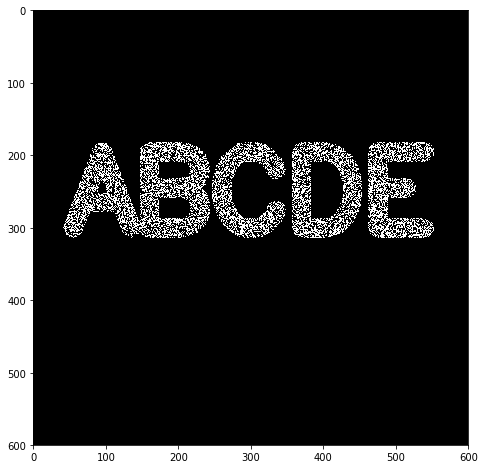

In [208]:
display_img(black_noise_img) # now previously we have bunch of noise in background but now we have in foreground
# closing is the good way to get rid of foreground noise

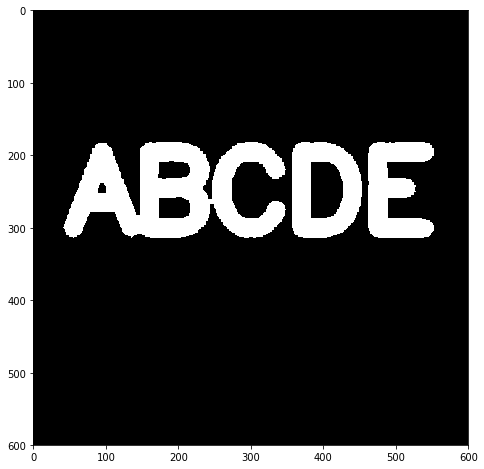

In [209]:
result = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)
display_img(result) # we can see that noise has been removed.

## Morphological Gradient
* It is the difference between dilation and erosion of an image.
* The result will look like the outline of the object.
* It is usefull in edge detection.
* We will use cv2.MORPH_GRADIENT as op parameter.

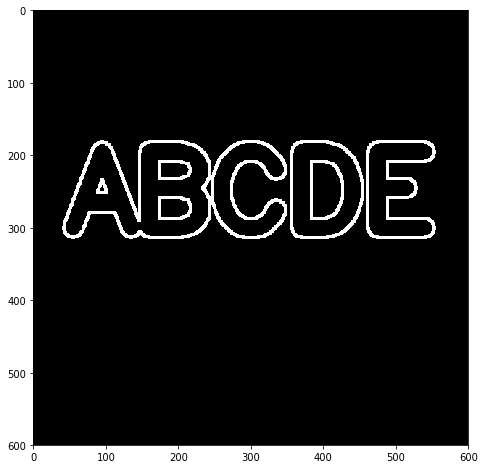

In [212]:
img = load_img()
result = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(result)

In [ ]:
# There are more op(opeartions) you can explore.